In [3]:
import arviz as az
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

from matplotlib import pylab as plt
from scipy import stats

/Users/davidg/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
rng = np.random.default_rng()

%config InlineBackend.figure_format = 'retina'
%load_ext watermark
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89

# Chapter 4 - GEOCENTRIC MODELS

### End of chapter problems

### My answer to 4E1-3

given:

$y_i \sim Normal(\mu, \sigma)$

$\mu \sim Normal(0, 10)$

$\sigma \sim Exponential(1)$

$$ \frac{Pr(\mu, \sigma | y_i) = Pr(y_i | \mu, \sigma) Pr(\mu) Pr(\sigma)}{\int Pr(y_i | \mu, \sigma) Pr(\mu, \sigma)\,d\mu\,d\sigma}$$

N.B. This assumes independence of $\mu$ and $\sigma$, otherwise must use $Pr(\mu | \sigma) Pr(\sigma)$ instead of $Pr(\mu) Pr(\sigma)$

$$\Rightarrow$$

$$ \frac{Pr(\mu, \sigma | y_i) = Normal(y_i | \mu, \sigma) Normal(\mu | 0, 10) Exponential(\sigma | 1)}{\int Pr(\mu, \sigma | y_i) = Normal(y_i | \mu, \sigma) Normal(\mu | 0, 10) Exponential(\sigma | 1)\,d\mu\,d\sigma} $$

### 4E1.

In the model definition below, which line is the likelihood?

yi ∼ Normal(µ, σ)

µ ∼ Normal(0, 10)

σ ∼ Exponential(1)

#### Answer 
The first line defines the likelihood

### 4E2.
In the model definition just above, how many parameters are in the posterior distribution?

#### Answer 
There are two parameters in the posterior, $\mu $ and $\sigma$

### 4E3.
Using the model definition above, write down the appropriate form of Bayes’ theorem that includes the proper likelihood and priors

#### Answer 


$ Pr(\mu,\sigma | \underline{x}) = \frac{Pr(\underline{x}|\mu,\sigma)Pr(\mu)Pr(\sigma)}{Pr(\underline{h})} \propto \frac{1}{\sigma}\prod_i exp(-\frac{1}{2}(\frac{x_i - \mu}{\sigma})^2) \times  exp(-\frac{1}{2}(\frac{\mu}{10})^2) \times exp(-\sigma)$

$ \implies Pr(\mu,\sigma | \underline{x}) = \frac{\frac{1}{\sigma}\prod_i exp(-\frac{1}{2}(\frac{x_i - \mu}{\sigma})^2)exp(-\frac{1}{2}(\frac{\mu}{10})^2)exp(-\sigma)}{\int \int \frac{1}{\sigma}\prod_i exp(-\frac{1}{2}(\frac{x_i - \mu}{\sigma})^2)exp(-\frac{1}{2}(\frac{\mu}{10})^2)exp(-\sigma) d\mu d\sigma}$

### 4E4.
In the model definition below, which line is the linear model?
yi ∼ Normal(µ, σ)

µi = α + βxi

α ∼ Normal(0, 10)

β ∼ Normal(0, 1)

σ ∼ Exponential(2)

#### Answer 
The second line. It encodes the linear dependence of the mean of the likelihood on the predictor variable, xi

### 4E5.
In the model definition just above, how many parameters are in the posterior distribution?

#### Answer 
There are three paramaters in the posterior distribution. $\alpha$, $\beta$, and $\sigma$.

### 4M1.
For the model definition below, simulate observed y values from the prior (not the posterior).

yi ∼ Normal(µ, σ)

µ ∼ Normal(0, 10)

σ ∼ Exponential(1)

<AxesSubplot: >

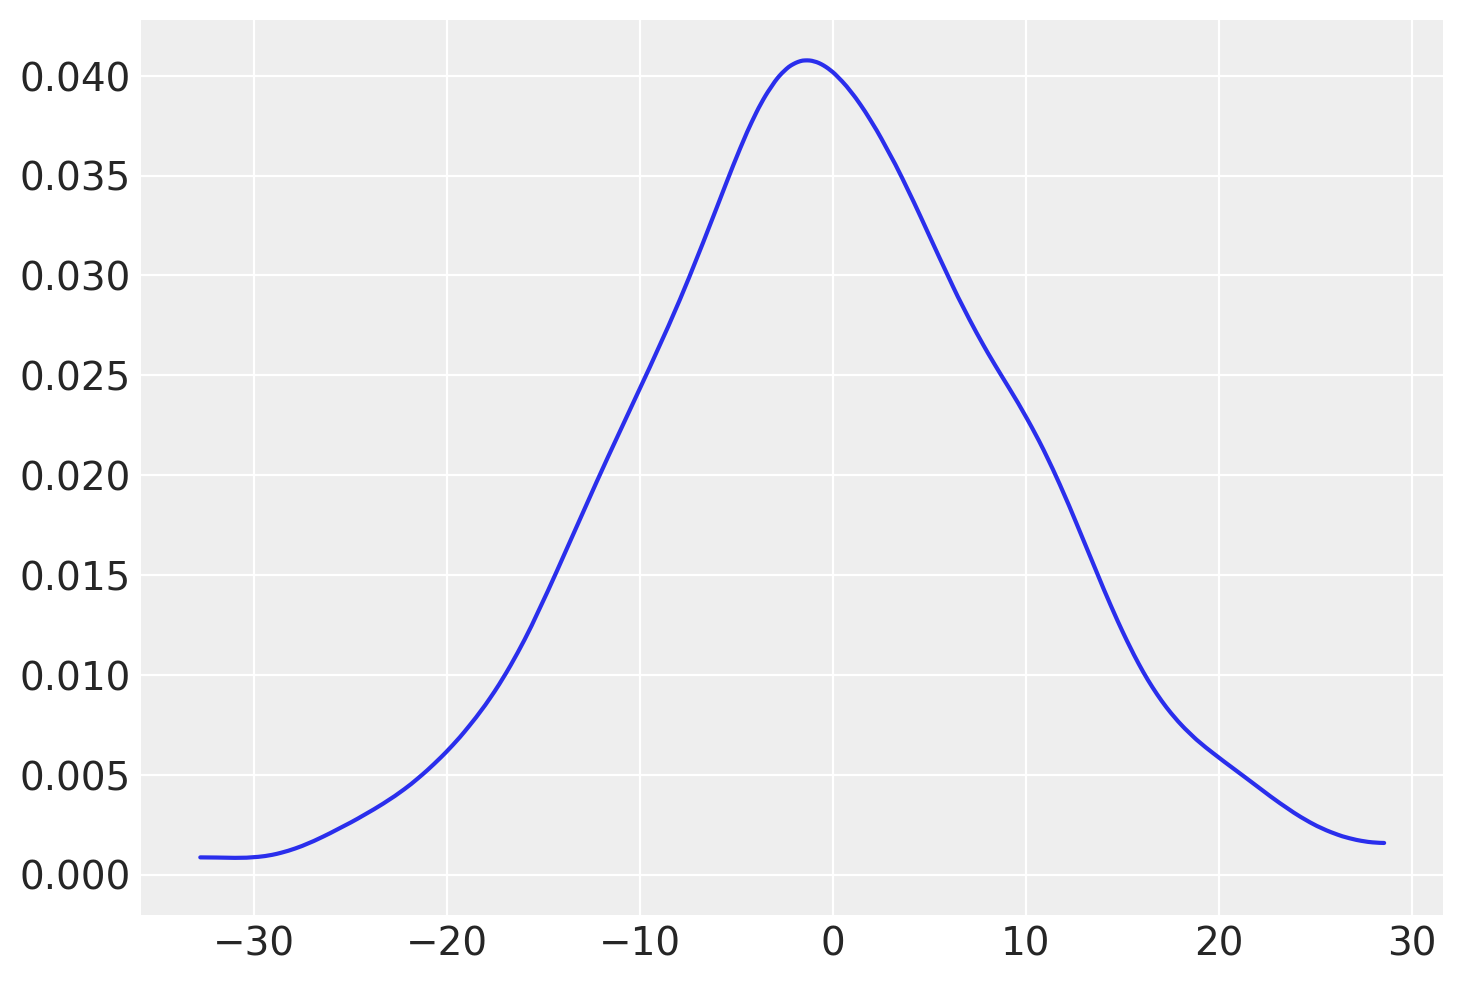

In [7]:
mu = rng.normal(0, 10, size=1000)
sigma = rng.exponential(1, size=1000)
yi = rng.normal(mu, sigma)

az.plot_kde(yi)

### 4M2.
Translate the model just above into a quap formula.

#### Answer
I'll use pymc since quap is a function in the statistical rethinking R package

In [ ]:
with pm.Model() as distribution_approximator:
    mu = pm.Normal("mu", 0, 10)
    sigma = pm.Exponential("sigma", 1)
    yi = pm.Normal("yi", mu, sigma)
    trace = pm.sample()

### 4M3. Translate the quap model formula below into a mathematical model definition.

flist <- alist(

    y ~ dnorm( mu , sigma ),
    mu <- a + b*x,
    a ~ dnorm( 0 , 10 ),
    b ~ dunif( 0 , 1 ),
    sigma ~ dexp( 1 )
)
#### Answer

$$ y_i \sim Normal(\mu, \sigma) $$
$$ \mu = a + bx_i$$
$$ a \sim Normal(0, 10)$$
$$ b \sim Uniform(0, 1)$$
$$ \sigma \sim Exponential(1)$$

### 4M4

A sample of students is measured for height each year for 3 years. After the third year, you want to fit a linear regression predicting height using year as a predictor. Write down the mathematical
model definition for this regression, using any variable names and priors you choose. Be prepared to
defend your choice of priors.

#### Answer
These values assume height ($y_i$) is in cm
$$ y_i \sim Normal(\mu, \sigma) $$
$$ \mu = a + bx_i$$
$$ a \sim Normal(150, 30)$$
$$ b \sim LogNormal(1, 1)$$
$$ \sigma \sim Uniform(0, 30)$$

### 4M5
Now suppose I remind you that every student got taller each year. Does this information lead you to change your choice of priors?

No this is already factored in via the use of a lognormal

### 4M6
Now suppose I tell you that the variance among heights for students of the same age is never more than 64cm. How does this lead you to revise your priors?

#### Answer


the upper bound on sigma must be sqrt(64), therefore

$$ \sigma \sim Uniform(0, 8)$$

### 4H1.

The weights listed below were recorded in the !Kung census, but heights were not recorded for
these individuals. Provide predicted heights and 89% intervals for each of these individuals. That is,
fill in the table below, using model-based predictions.

| Individual | Weight | Expected height | 89% interval|
|------|------|-------|-----|
|   1  | 46.95|?|?|
|   2  | 43.72|?|?|
|   3  | 64.78|?|?|
|   4  | 32.59|?|?|
|   5  | 54.63|?|?|

In [18]:
# define the data
individuals = np.linspace(1, 5, 5)
weight = np.array([46.95, 43.72, 64.78, 32.59, 54.63])
# compute the mean predictions
means = mean_q["alpha"] + mean_q["beta"] * weight
# compute the prediction intervals
pred_intervals = np.array(
    [az.hdi(np.random.normal(loc=compute_mu(x), scale=post_samples[:, 2])) for x in weight]
)
data_dict = {
    "Individual": individuals,
    "Weight": weight,
    "Expected height": means,
    "Low_interval": pred_intervals[:, 0],
    "Upper_interval": pred_intervals[:, 1],
}

In [19]:
# present everything in a pandas dataframe
pd.DataFrame(data=data_dict)

,Individual,Weight,Expected height,Low_interval,Upper_interval
0,1.0,46.95,156.354091,148.686629,165.006168
1,2.0,43.72,153.477032,145.139440,161.406080
2,3.0,64.78,172.235815,163.591119,180.066446
3,4.0,32.59,143.563203,135.192446,151.640268
4,5.0,54.63,163.194901,154.721403,170.918289


### 4H2.

Select out all the rows in the Howell1 data with ages below 18 years of age. If you do it right,
you should end up with a new data frame with 192 rows in it.

(a) Fit a linear regression to these data, using quap. Present and interpret the estimates. For
every 10 units of increase in weight, how much taller does the model predict a child gets?

(b) Plot the raw data, with height on the vertical axis and weight on the horizontal axis. Superimpose the MAP regression line and 89% interval for the mean. Also superimpose the 89% interval
for predicted heights.

(c) What aspects of the model fit concern you? Describe the kinds of assumptions you would
change, if any, to improve the model. You don’t have to write any new code. Just explain what the
model appears to be doing a bad job of, and what you hypothesize would be a better model.



In [20]:
# get the young data
y_data = howell1[howell1.age < 18]

In [21]:
# check the correct amount of data is present
y_data.shape

(192, 4)

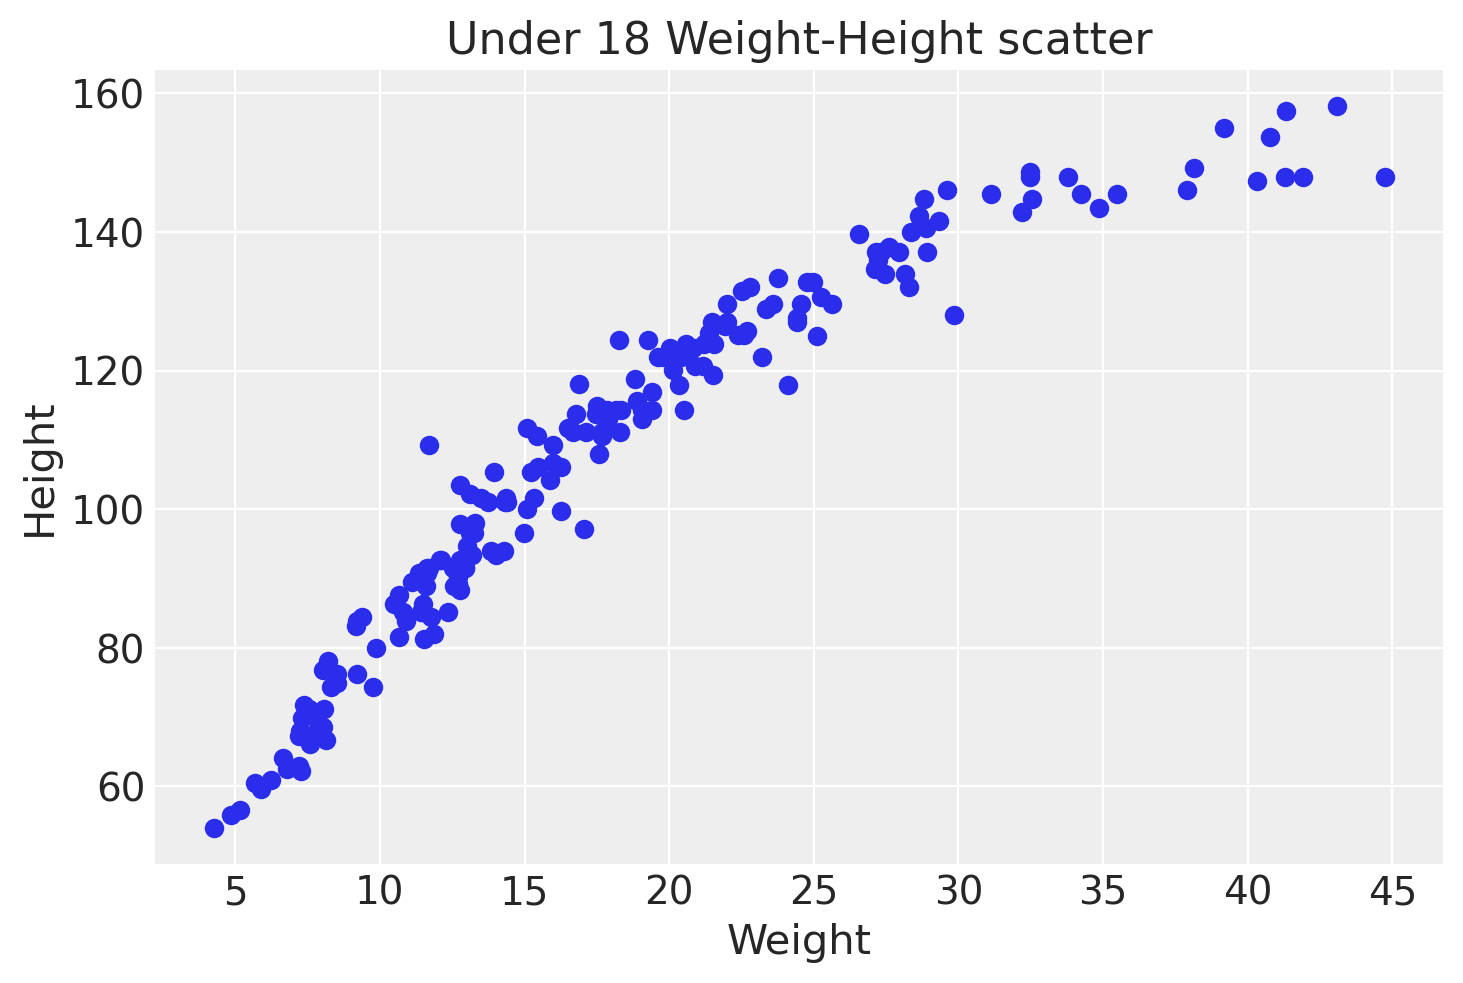

In [22]:
# check out the data
plt.scatter(y_data.weight, y_data.height)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Under 18 Weight-Height scatter");

I lazily fit the same model from earlier

$H_i$ ~ $N(\mu_i,\sigma^2)$

$\mu_i = \alpha + \beta(x_i - \bar{x})$

$\alpha$ ~ $log-N(178,20^2)$

$\beta$ ~ $N(0,10)$

$\sigma$ ~ $Unif(0,50)$

In [23]:
np.mean(y_data.weight.values)

18.414193058854167

In [24]:
# obtain a linear model with the quadtratic approximation
with pm.Model() as m4_1:
    alpha = pm.Normal("alpha", mu=178, sd=20)  # prior on alpha
    beta = pm.Lognormal("beta", mu=0, tau=1)  # prior on beta
    sigma = pm.Uniform("sigma", 0, 50)  # prior on sigma
    mu = alpha + beta * (y_data.weight.values - np.mean(y_data.weight.values))
    height = pm.Normal(
        "height", mu=mu, sd=sigma, observed=y_data.height.values
    )  # likelihood of the data
    mean_q = pm.find_MAP()
    print(mean_q)
    # find the hessian matrix
    Hess = pm.find_hessian(mean_q, vars=[alpha, beta, sigma])


{'alpha': array(110.51577411), 'beta_log__': array(0.95429403), 'sigma_interval__': array(36.49940751), 'beta': array(2.59683665), 'sigma': array(50.)}


In [25]:
var_cov = np.linalg.inv(Hess)
means = np.fromiter(mean_q.values(), dtype=float)[[0, 3, 4]]
# resample for posterior for 10,000 sample
post_samples = np.random.multivariate_normal(means, var_cov, size=10000)
# compute the hpdi for a range of weight values
cred_intervals = np.array(
    [
        az.hdi(post_samples[:, 0] + post_samples[:, 1] * (x - np.mean(y_data.weight)))
        for x in np.linspace(0, 50)
    ]
)
# define a function to compute mu for all posterior samples at given value of x

<ipython-input-25-17925886c0dc>:4: RuntimeWarning: covariance is not positive-semidefinite.
  post_samples = np.random.multivariate_normal(means, var_cov, size=10000)


In [26]:
def compute_mu(x):
    return post_samples[:, 0] + post_samples[:, 1] * (x - np.mean(y_data.weight))

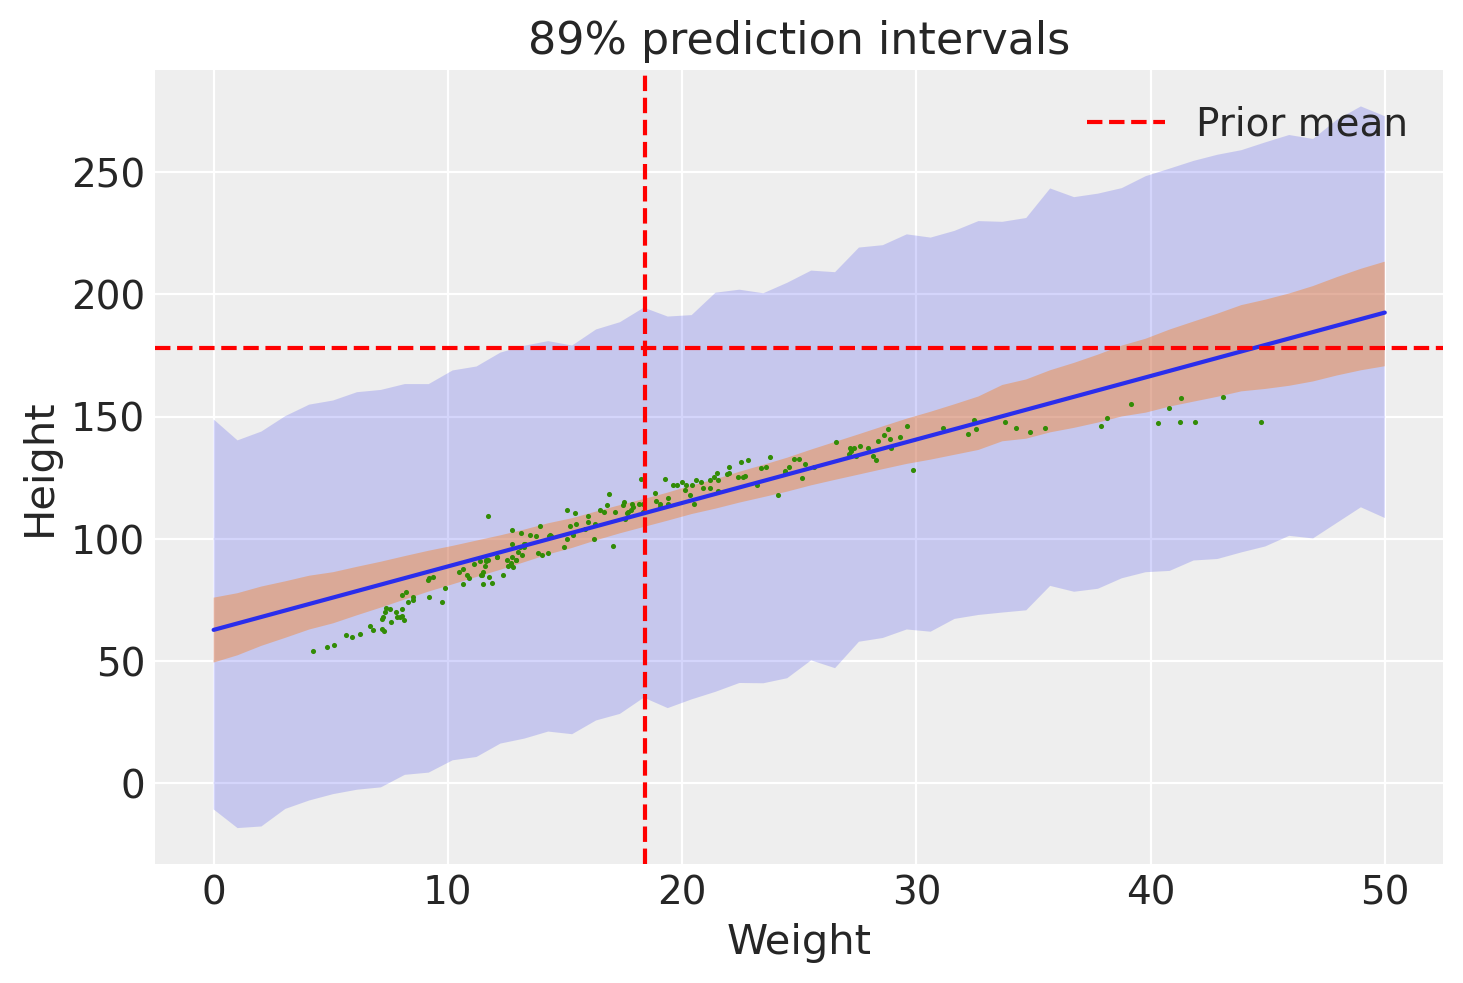

In [27]:
# compute the prediction interval in one line
mu = mean_q["alpha"] + mean_q["beta"] * (np.linspace(0, 50, 100) - np.mean(y_data.weight))
pred_intervals = np.array(
    [
        az.hdi(np.random.normal(loc=compute_mu(x), scale=post_samples[:, 2]))
        for x in np.linspace(0, 50)
    ]
)
plt.fill_between(np.linspace(0, 50), pred_intervals[:, 0], pred_intervals[:, 1], alpha=0.2)
plt.fill_between(np.linspace(0, 50), cred_intervals[:, 0], cred_intervals[:, 1], alpha=0.4)
plt.plot(np.linspace(0, 50, 100), mu)
plt.scatter(y_data.weight, y_data.height, s=0.7)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("89% prediction intervals")
plt.axvline(np.mean(y_data.weight), ls="--", c="r")
plt.axhline(178, ls="--", c="r", label="Prior mean")
plt.legend();

As can be seen, this gives absurdly large prediction intervals. This is because I chose a stupid prior for $\alpha$, which is the mean height at the mean weight. This is indicated by the crossover of the red lines above. If, we set the prior as $\alpha$ ~ $N(100,20^2)$ and then re-run everything, we see that we get far more sensible results for the data.

In [28]:
# obtain a linear model with Laplace's approximation
with pm.Model() as m4_1:
    alpha = pm.Normal("alpha", mu=100, sd=20)  # prior on alpha
    beta = pm.Lognormal("beta", mu=0, tau=1)  # prior on beta
    sigma = pm.Uniform("sigma", 0, 50)  # prior on sigma
    mu = alpha + beta * (y_data.weight.values - np.mean(y_data.weight.values))
    height = pm.Normal(
        "height", mu=mu, sd=sigma, observed=y_data.height.values
    )  # likelihood of the data
    mean_q = pm.find_MAP()
    print(mean_q)
    # find the hessian matrix
    Hess = pm.find_hessian(mean_q, vars=[alpha, beta, sigma])


{'alpha': array(108.31115082), 'beta_log__': array(0.99940212), 'sigma_interval__': array(-1.5945605), 'beta': array(2.71665711), 'sigma': array(8.4371617)}


In [29]:
def compute_mu(x):
    return post_samples[:, 0] + post_samples[:, 1] * (x - np.mean(y_data.weight))

In [30]:
var_cov = np.linalg.inv(Hess)
means = np.fromiter(mean_q.values(), dtype=float)[[0, 3, 4]]
# resample for posterior for 10,000 sample
post_samples = np.random.multivariate_normal(means, var_cov, size=10000)
# compute the hpdi for a range of weight values
cred_intervals = np.array(
    [
        az.hdi(post_samples[:, 0] + post_samples[:, 1] * (x - np.mean(y_data.weight)))
        for x in np.linspace(0, 50)
    ]
)
# define a function to compute mu for all posterior samples at given value of x

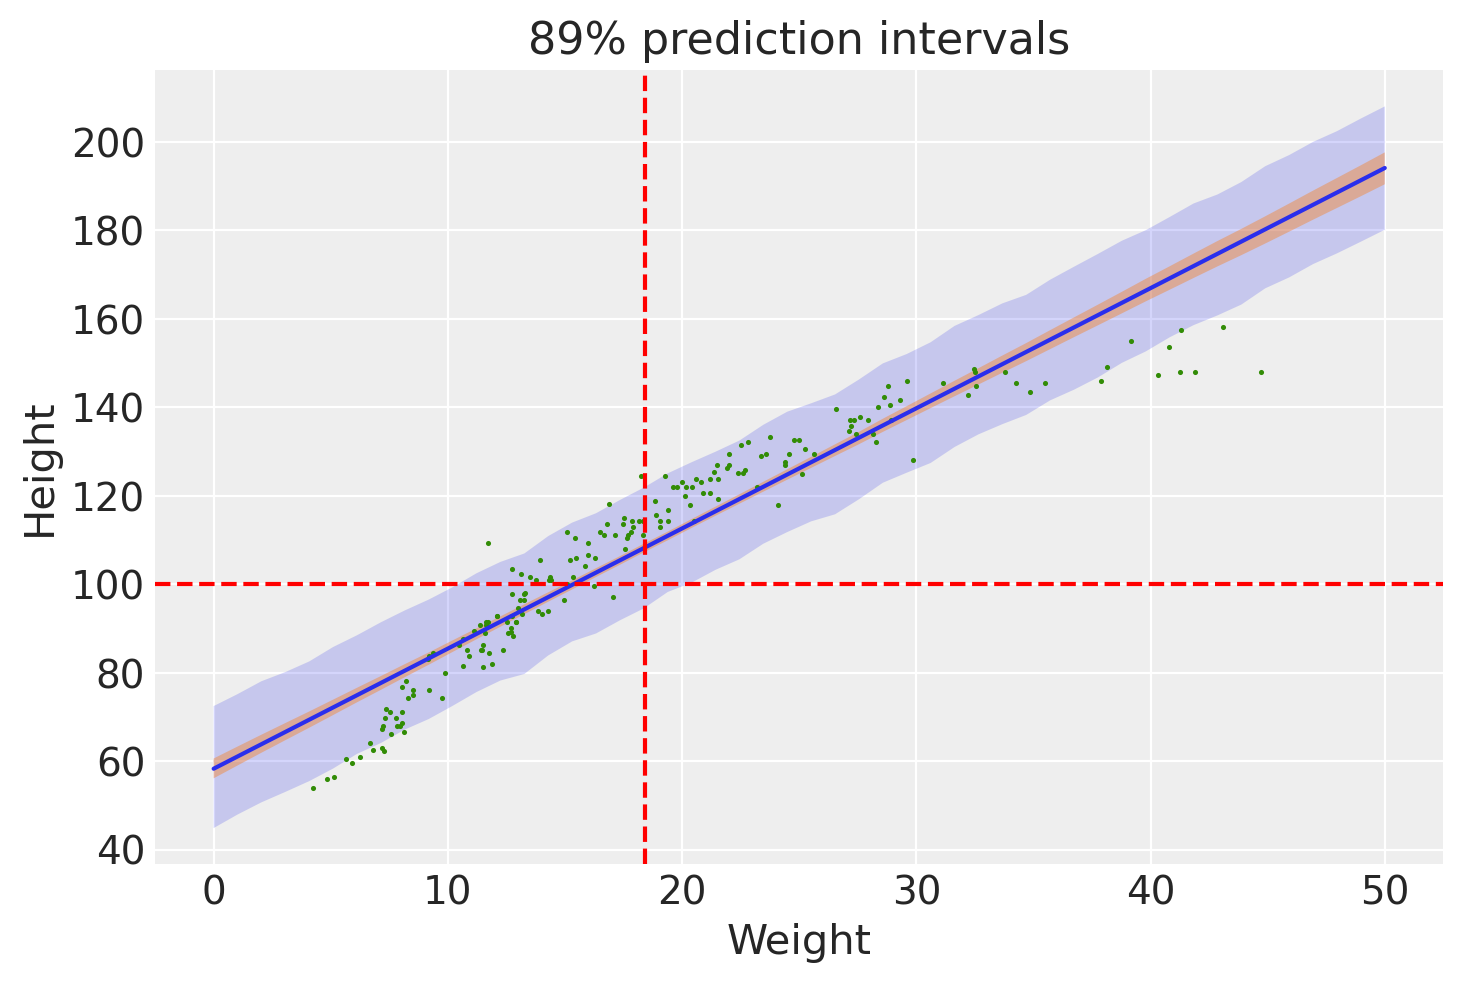

In [31]:
# compute the prediction interval in one line
mu = mean_q["alpha"] + mean_q["beta"] * (np.linspace(0, 50, 100) - np.mean(y_data.weight))
pred_intervals = np.array(
    [
        az.hdi(
            np.random.normal(loc=compute_mu(x), scale=post_samples[:, 2]),
        )
        for x in np.linspace(0, 50)
    ]
)
plt.fill_between(np.linspace(0, 50), pred_intervals[:, 0], pred_intervals[:, 1], alpha=0.2)
plt.fill_between(np.linspace(0, 50), cred_intervals[:, 0], cred_intervals[:, 1], alpha=0.4)
plt.plot(np.linspace(0, 50, 100), mu)
plt.scatter(y_data.weight, y_data.height, s=0.7)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("89% prediction intervals")
plt.axvline(np.mean(y_data.weight), ls="--", c="r", label="Mean weight")
plt.axhline(100, ls="--", c="r", label="Mean weight");

This is a much better fit and the narrow prediction intervals reflect this. The model is still poor in many regards. This includes the failure of the model to capture the non-linear variation of height with weight, which results in poor predictions at the extreme ends of the distribution. The reason the linearity breaks down is fairly intuitive. If I over consume food, my weight will go up, but my height will not. Consumption is a contributing factor to weight, but not height that violates the model's linear assumption. Trying a non-linear model would help aid in the prediction at the tails.

### 4H3.
Suppose a colleague of yours, who works on allometry, glances at the practice problems just
above. Your colleague exclaims, “That’s silly. Everyone knows that it’s only the logarithm of body
weight that scales with height!” Let’s take your colleague’s advice and see what happens.

(a) Model the relationship between height (cm) and the natural logarithm of weight (log-kg). Use
the entire Howell1 data frame, all 544 rows, adults and non-adults. Can you interpret the resulting
estimates?

(b) Begin with this plot: plot( height ~ weight , data=Howell1 ). Then use samples
from the quadratic approximate posterior of the model in (a) to superimpose on the plot: (1) the
predicted mean height as a function of weight, (2) the 97% interval for the mean, and (3) the 97%
interval for predicted heights

In [32]:
# produce the new log_weight feature
howell1["log_weight"] = np.log(howell1.weight)

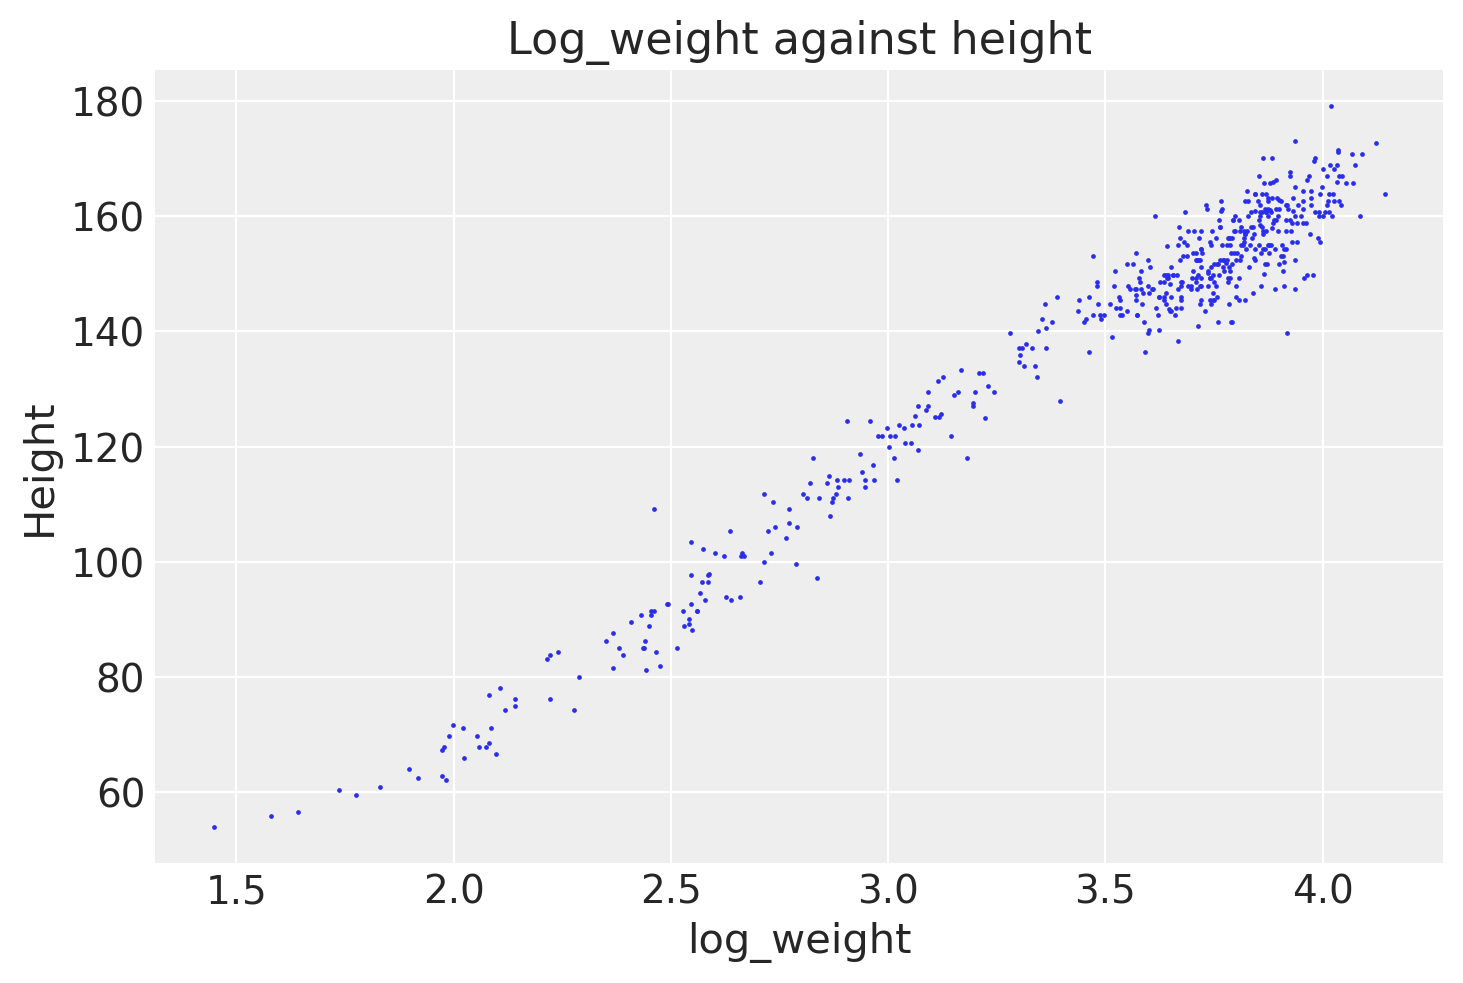

In [33]:
plt.title("Log_weight against height")
plt.scatter(howell1.log_weight, howell1.height, s=0.5)
plt.xlabel("log_weight")
plt.ylabel("Height");

In [34]:
howell1

,height,weight,age,male,log_weight
0,151.765,47.825606,63.0,1,3.867561
1,139.700,36.485807,63.0,0,3.596923
2,136.525,31.864838,65.0,0,3.461503
3,156.845,53.041915,41.0,1,3.971082
4,145.415,41.276872,51.0,0,3.720302
...,...,...,...,...,...
539,145.415,31.127751,17.0,1,3.438100
540,162.560,52.163080,31.0,1,3.954375
541,156.210,54.062496,21.0,0,3.990141
542,71.120,8.051258,0.0,1,2.085828


In [35]:
np.mean(howell1.log_weight)

3.442329848013859

Let's use the following model for the relationship between log weight and height.


$H_i$ ~ $N(\mu_i,\sigma^2)$

$\mu_i = \alpha + \beta(log(x_i) - log(\bar{x}))$

$\alpha$ ~ $N(178,20^2)$

$\beta$ ~ $Log-N(1,10)$

$\sigma$ ~ $Unif(0,50)$

In [36]:
# obtain a linear model with Laplace's approximation
with pm.Model() as m4_1:
    alpha = pm.Normal("alpha", mu=178, sd=20)  # prior on alpha
    beta = pm.Lognormal("beta", mu=0, tau=1)  # prior on beta
    sigma = pm.Uniform("sigma", 0, 50)  # prior on sigma
    mu = alpha + beta * (howell1.log_weight.values - np.mean(howell1.log_weight.values))
    # likelihood of the data
    height = pm.Normal("height", mu=mu, sd=sigma, observed=howell1.height.values)
    mean_q = pm.find_MAP()
    print(mean_q)
    # find the hessian matrix
    Hess = pm.find_hessian(mean_q, vars=[alpha, beta, sigma])


{'alpha': array(138.26840263), 'beta_log__': array(3.85166003), 'sigma_interval__': array(-2.16764365), 'beta': array(47.07113773), 'sigma': array(5.13469817)}


In [37]:
var_cov = np.linalg.inv(Hess)
means = np.fromiter(mean_q.values(), dtype=float)[[0, 3, 4]]
# resample for posterior for 10,000 sample
post_samples = np.random.multivariate_normal(means, var_cov, size=10000)
# compute the hpdi for a range of weight values
cred_intervals = np.array(
    [
        az.hdi(
            post_samples[:, 0] + post_samples[:, 1] * (np.log(x) - np.mean(howell1.log_weight)),
            hdi_prob=0.97,
        )
        for x in np.linspace(0, 50)
    ]
)
# define a function to compute mu for all posterior samples at given value of x

In [38]:
def compute_mu(x):
    return post_samples[:, 0] + post_samples[:, 1] * (x - np.mean(howell1.log_weight))

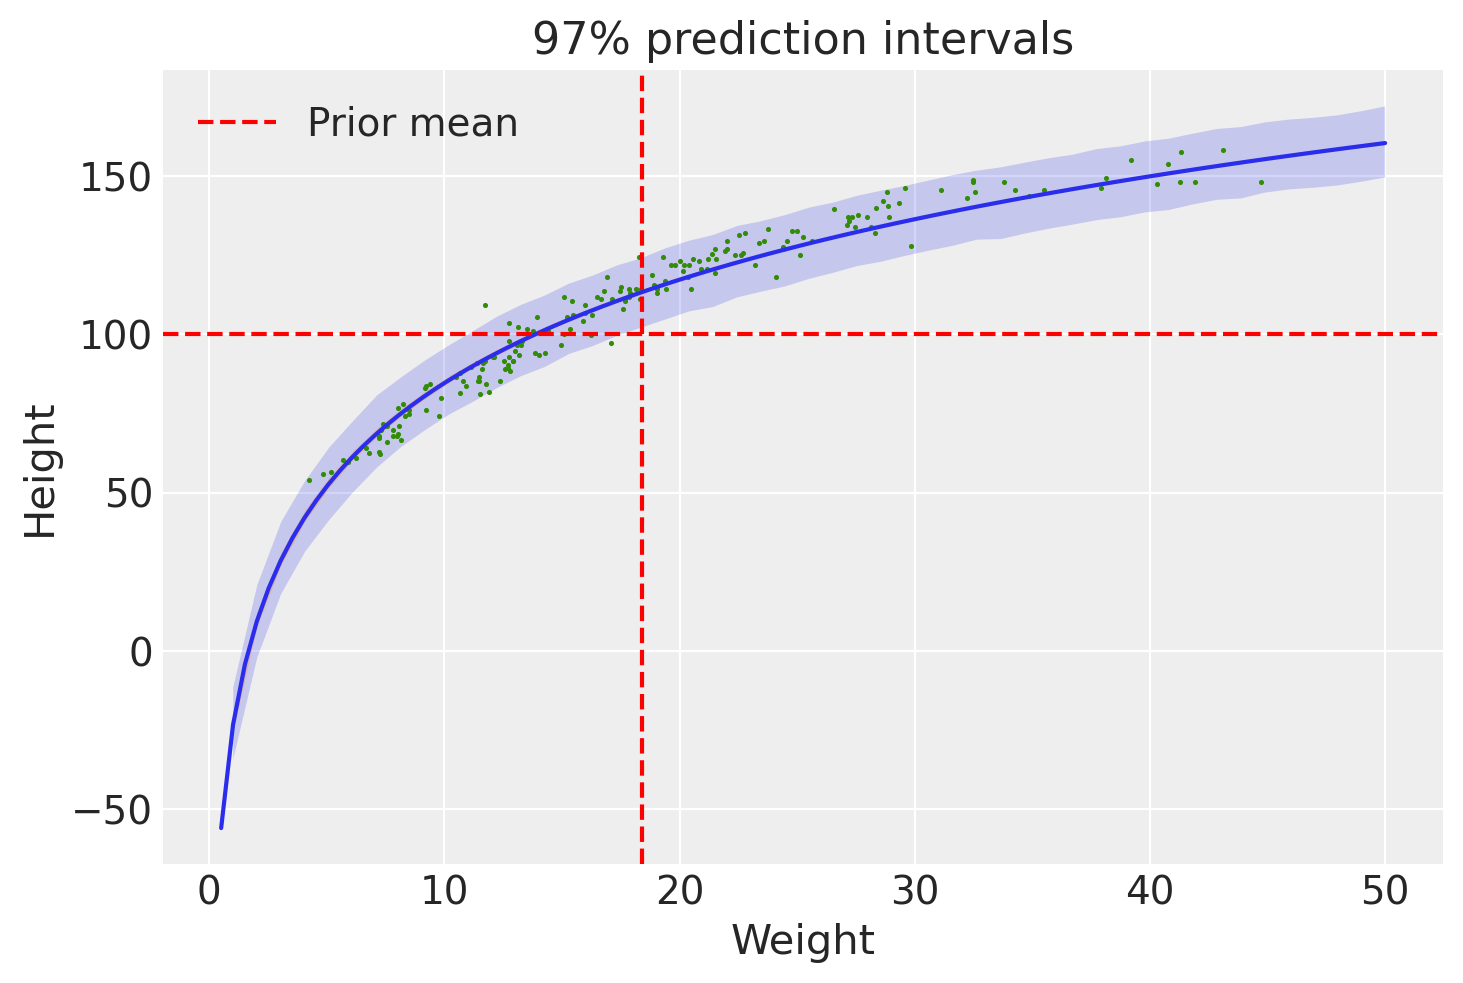

In [39]:
# compute the prediction interval in one line
mu = mean_q["alpha"] + mean_q["beta"] * (
    np.log(np.linspace(0, 50, 100)) - np.mean(howell1.log_weight)
)
pred_intervals = np.array(
    [
        az.hdi(
            np.random.normal(loc=compute_mu(x), scale=post_samples[:, 2]),
            hdi_prob=0.97,
        )
        for x in np.log(np.linspace(0, 50))
    ]
)
plt.fill_between(np.linspace(0, 50), pred_intervals[:, 0], pred_intervals[:, 1], alpha=0.2)
plt.fill_between(np.linspace(0, 50), cred_intervals[:, 0], cred_intervals[:, 1], alpha=0.3)
plt.plot(np.linspace(0, 50, 100), mu)
plt.scatter(y_data.weight, y_data.height, s=0.7)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("97% prediction intervals")
plt.axvline(np.mean(y_data.weight), ls="--", c="r")
plt.axhline(100, ls="--", c="r", label="Prior mean")
plt.legend();

Using a log transform of the data appears to give sensible results for our observations. Obviously, extrapolating this fit too far will give terrible conclusions.

### 4H4.
Plot the prior predictive distribution for the parabolic polynomial regression model in the
chapter. You can modify the code that plots the linear regression prior predictive distribution. Can
you modify the prior distributions of α, β1, and β2 so that the prior predictions stay within the biologically reasonable outcome space? That is to say: Do not try to fit the data by hand. But do try to
keep the curves consistent with what you know about height and weight, before seeing these exact
data.

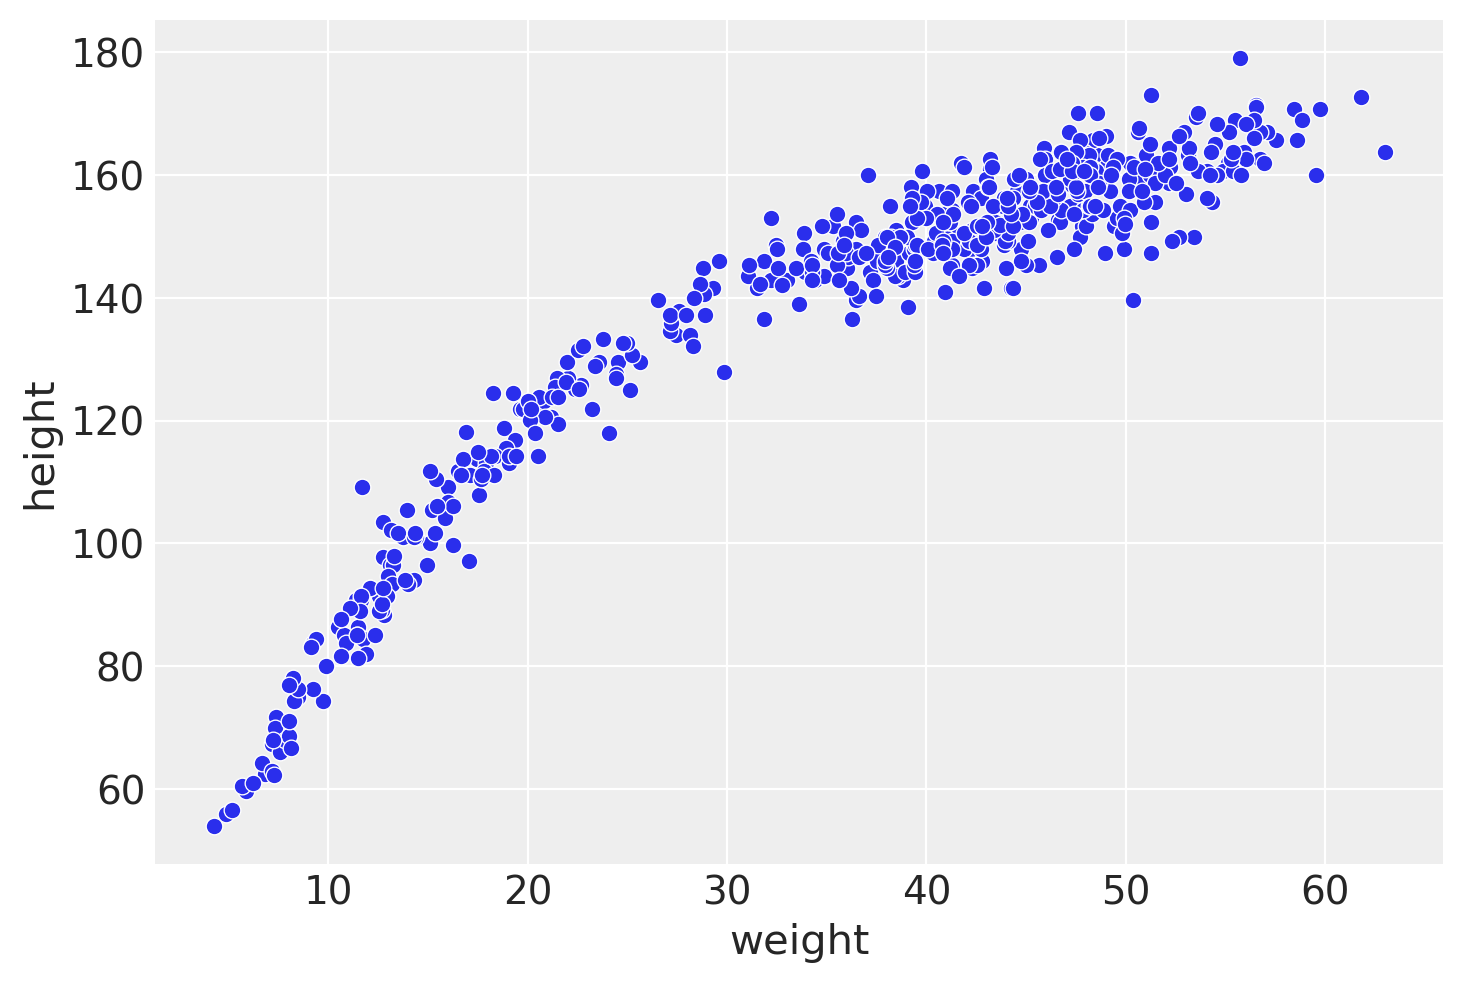

In [40]:
sns.scatterplot(x="weight", y="height", data=howell1);

#### Answer

The justifications for the priors are written along side:

$H_i$ ~ $N(\mu_i,\sigma^2)$

$\mu_i = \alpha + \beta_1 (x_i - \overline{x}) - \beta_2(x_i - \overline{x})^2 $ #Note that it's -$\beta_2$. Positive prior on $\beta$ ensures the paraboloid curves in the correct direction.

$\alpha$ ~ $N(150,30^2)$ # Reduced mean height at mean weight, as we are looking at a much larger age range now, so we expect younger people to drag the mean height down at any given weight relative to the adult only data set

$\beta_1$ ~ $Lognormal(0,1)$ # Need a linear base line to perturb with a quadratic term


The seconds term puts a small deviation from linearity

$\beta_2$ ~ $exp(0.05)$ #This should be positive to ensure concavity, and small to ensure small only small perturbation from linearity in weights

$\sigma$ ~ $Unif(0,50)$

In [41]:
# Generate prior predictive checks
with pm.Model() as model:
    alpha = pm.Normal("alpha", 150, 30)
    b1 = pm.Lognormal("b1", 0, 1)
    b2 = pm.Exponential("b2", 1 / 0.05)
    sigma = pm.Uniform("sigma", 0, 1)
    mu = (
        alpha
        + b1 * (howell1.weight - np.mean(howell1.weight))
        - b2 * (howell1.weight - np.mean(howell1.weight)) ** 2
    )
    H = pm.Normal("H", mu=mu, sigma=sigma, observed=howell1.height)
    pp = pm.sample_prior_predictive(samples=1000)  # compute prior predictions

In [42]:
x = np.linspace(0, 70)
mh = np.mean(howell1.weight)
means = pp["alpha"] + np.outer(x - mh, pp["b1"]) - np.outer((x - mh) ** 2, pp["b2"])

/home/aidan/anaconda3/envs/pymc/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


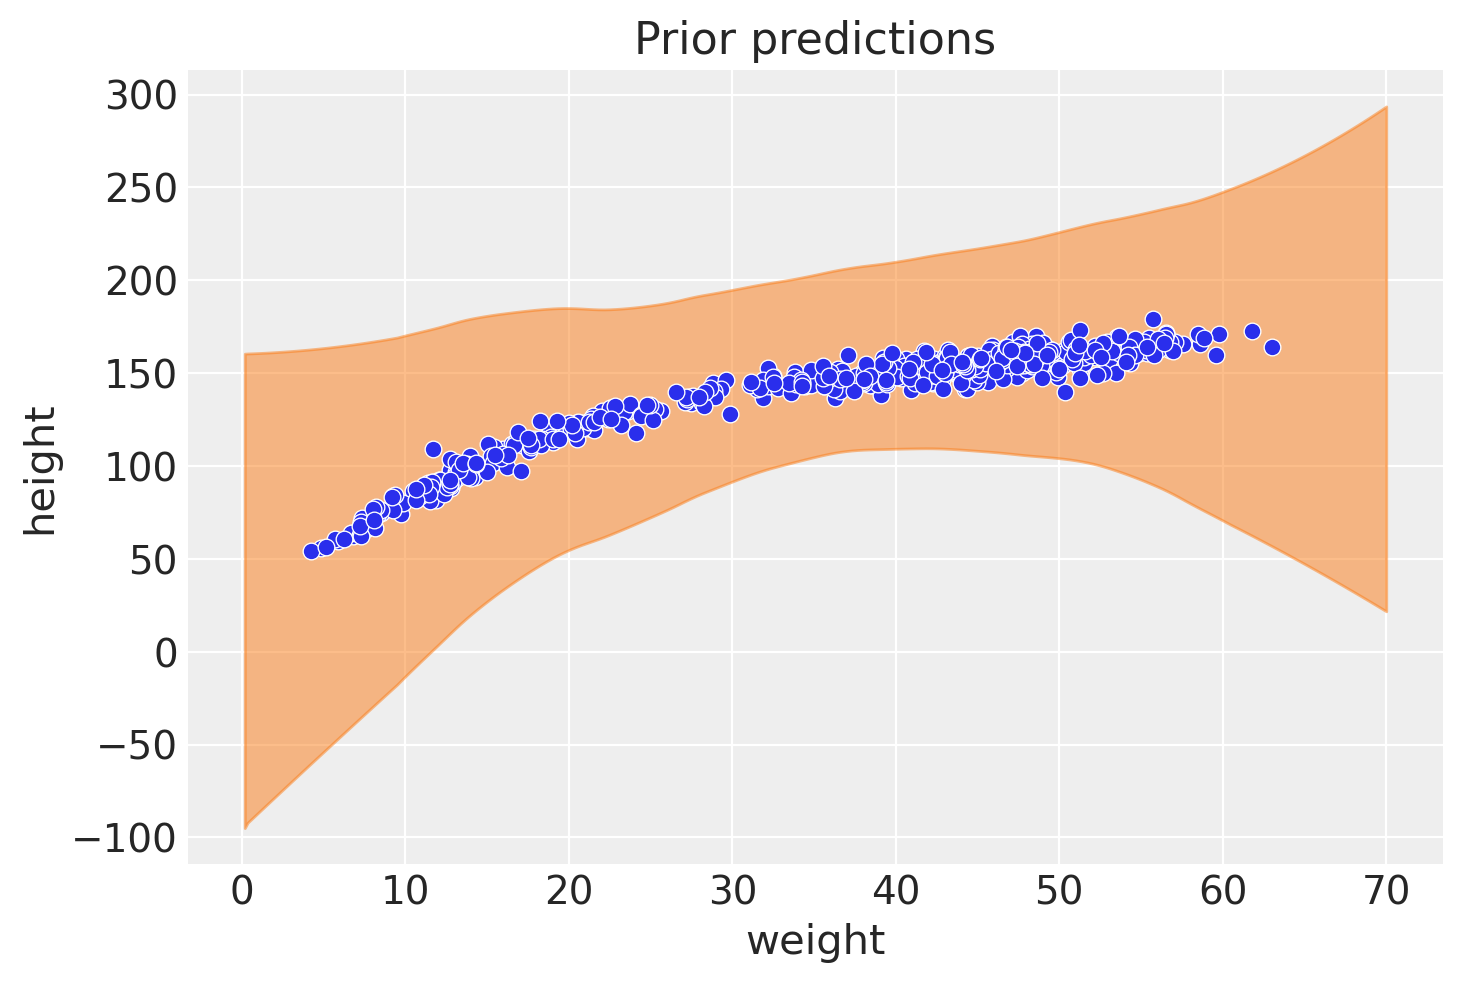

In [43]:
az.plot_hdi(x, means.T, hdi_prob=0.89)
sns.scatterplot(x="weight", y="height", data=howell1)
plt.title("Prior predictions");

By using an exponential prior on $\beta_2$ this ensures the parabolic curve must be concave, thus no increasing growth in height with weight is possible and makes perfect sense on physical grounds. However, extreme and absurd values are still found near the extremes of the data. One could tighten the parameters to ensure this didn't happen, but as a first approximation this isn't too bad.

In [44]:
%watermark -n -u -v -iv -w

Last updated: Tue Dec 22 2020

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.18.1

arviz     : 0.9.0
pymc     : 3.9.3
scipy     : 1.5.2
seaborn   : 0.11.0
numpy     : 1.19.1
matplotlib: 3.3.2
pandas    : 1.1.3

Watermark: 2.1.0

